<a href="https://colab.research.google.com/github/MuhammedShiway/AICrowd-Mosquito/blob/main/%5B04%5D_Mosquito_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive




---

# <center> PATHS </center>


---



In [46]:
# IMAGE PATHS
train_path = '/content/gdrive/MyDrive/Colab Notebooks/AI CROWD Mosquito/Dataset/Original /train_images'
test_path = '/content/gdrive/MyDrive/Colab Notebooks/AI CROWD Mosquito/Dataset/Original /test_images_phase1'

# CSV PATHS
train_csv_path = '/content/gdrive/MyDrive/Colab Notebooks/AI CROWD Mosquito/Dataset/Original /train.csv'
test_csv_path = '/content/gdrive/MyDrive/Colab Notebooks/AI CROWD Mosquito/Dataset/Original /test_phase1_v2.csv'

# YOLO PATHS
yolo_train = '/content/gdrive/MyDrive/Colab Notebooks/AI CROWD Mosquito/Dataset/YOLO/Train'
yolo_test = '/content/gdrive/MyDrive/Colab Notebooks/AI CROWD Mosquito/Dataset/YOLO/Test'

# MODEL PATHS
model_path = '/content/gdrive/MyDrive/Colab Notebooks/AI CROWD Mosquito/Dataset/YOLO/Detection Models/RUN 7.pt'

# CROPPED PATHS
train_csv_crop = '/content/gdrive/MyDrive/Colab Notebooks/AI CROWD Mosquito/Dataset/Cropped/Train_CSV'
train_yolo_crop = '/content/gdrive/MyDrive/Colab Notebooks/AI CROWD Mosquito/Dataset/Cropped/Train_YOLO'
test_crop = '/content/gdrive/MyDrive/Colab Notebooks/AI CROWD Mosquito/Dataset/Cropped/Test'


csv_file = train_csv_path



---

# <center> IMPORT MODULES AND LIBRARIES </center>


---



In [33]:
import os
import random
import shutil
import csv
import pandas as pd
import torch
from PIL import Image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from sklearn.model_selection import train_test_split



---

# <center> FOLDER CONTENT DELETER </center>


---



In [ ]:
def delete_folder_contents(folder_path):
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        try:
            if os.path.isfile(file_path) or os.path.islink(file_path):
                os.unlink(file_path)
            elif os.path.isdir(file_path):
                shutil.rmtree(file_path)
        except Exception as e:
            print('Failed to delete %s. Reason: %s' % (file_path, e))

# Usage
# delete_folder_contents('/path/to/your/folder')




---

# <center> CROP TRAIN IMAGES [SAMPLE] </center>


---



In [6]:
# Load the CSV data into a pandas DataFrame
df = pd.read_csv(csv_file)

df.head()

,img_fName,img_w,img_h,bbx_xtl,bbx_ytl,bbx_xbr,bbx_ybr,class_label
0,92715872-3287-4bff-aa61-7047973e5c02.jpeg,2448,3264,1301,1546,1641,2096,albopictus
1,b0f7cc74-2272-4756-a387-38bcaf6965c8.jpeg,3024,4032,900,1897,1950,2990,albopictus
2,82df4b68-0f45-4afe-9215-48488bf3720e.jpeg,768,1024,220,58,659,808,albopictus
3,331ad30a-7564-4478-b863-7bc760adf5a1.jpeg,3456,4608,1169,2364,1586,2826,albopictus
4,1a46dbfb-104e-466b-88d7-98958d7b1fe9.jpeg,1024,1365,129,231,697,1007,culex


In [35]:
# PICK A RANDOM IMAGE

# OPEN THE DATA FROM CSV

# CROP THE IMAGE OUT

# PLOT THE ORIGINAL AND THE CROPPED ONE


# Path to your images and CSV
image_folder = train_path



# Get a list of all image names in the folder
image_names = os.listdir(image_folder)

# Pick a random image name
random_image_name = random.choice(image_names)

# Open the random image
img = Image.open(os.path.join(image_folder, random_image_name))

# Get the bounding box information for this image from the DataFrame
bbox_info = df[df['img_fName'] == random_image_name].iloc[0]


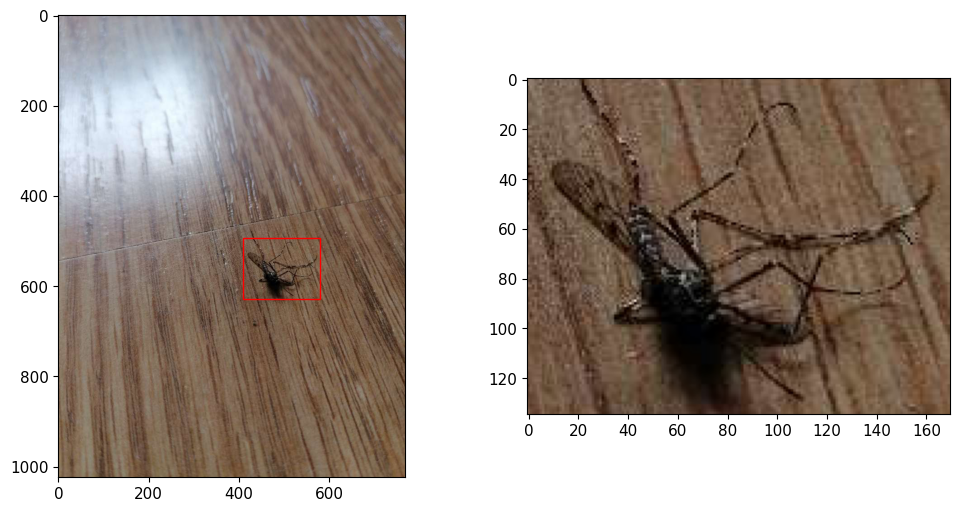

In [37]:

# Crop the image using the bounding box coordinates
cropped_img = img.crop((bbox_info['bbx_xtl'], bbox_info['bbx_ytl'], bbox_info['bbx_xbr'], bbox_info['bbx_ybr']))

# Plot the original and cropped images side by side
fig, axs0 = plt.subplots(1, 2, figsize=(12, 6))

# Plotting the original image with bounding box
axs0[0].imshow(img)
rect = patches.Rectangle((bbox_info['bbx_xtl'], bbox_info['bbx_ytl']),
                         bbox_info['bbx_xbr'] - bbox_info['bbx_xtl'],
                         bbox_info['bbx_ybr'] - bbox_info['bbx_ytl'],
                         linewidth=1, edgecolor='r', facecolor='none')
axs0[0].add_patch(rect)

# Plotting the cropped image
axs0[1].imshow(cropped_img)

plt.show()


In [13]:
# SETUP

%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.124 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.2/107.7 GB disk)


In [38]:
# USE THE MODEL TO PREDICT

# CROP THE IMAGE


# Load the model
model = torch.hub.load('ultralytics/yolov5', 'custom', path = model_path)

# Select a random image
random_image_name = random.choice(image_names)

# Open the random image
img_path = os.path.join(image_folder, random_image_name)
img = Image.open(img_path)

# Perform inference on the image
results = model(img_path)

# Get the bounding box information from the model prediction
# Here, we take the first detected object's bounding box
bbox_info = results.xyxy[0][0]  # xyxy format: [xmin, ymin, xmax, ymax]

# Convert the normalized bounding box coordinates to pixel values
xmin, ymin, xmax, ymax = bbox_info[:4]


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-7-2 Python-3.10.12 torch-2.0.1+cu118 CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients
Adding AutoShape... 


In [39]:
(xmin, ymin, xmax, ymax)

(tensor(1257.73279),
 tensor(1325.01746),
 tensor(1591.71631),
 tensor(1744.31848))

In [40]:
xmin = round(xmin.item())
ymin = round(ymin.item())
xmax = round(xmax.item())
ymax = round(ymax.item())

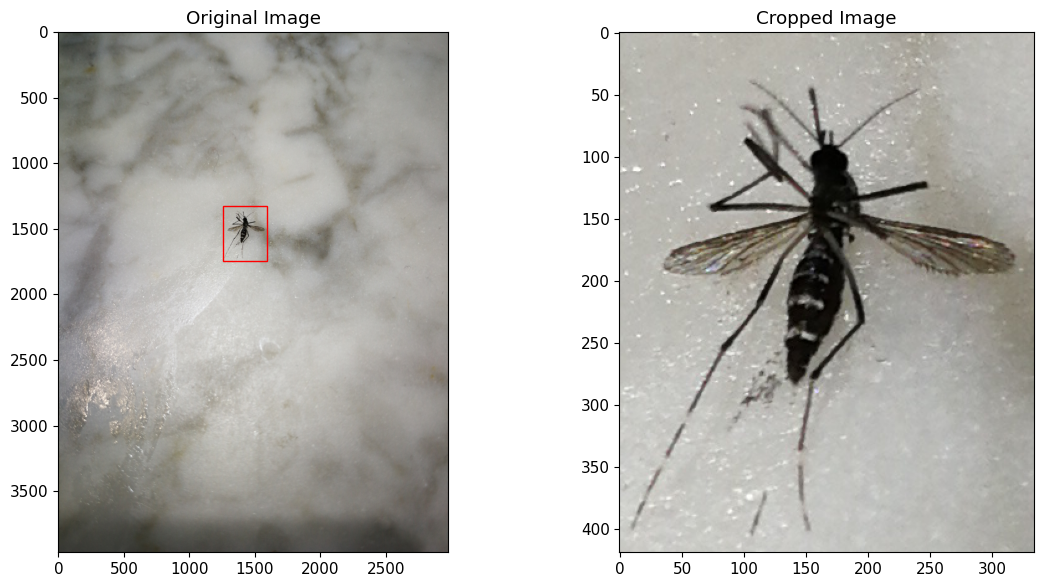

In [41]:
# Create a figure and axes to display the images
fig, axs1 = plt.subplots(1, 2, figsize=(12, 6))

# Display the original image with bounding box
axs1[0].imshow(img)
rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=1, edgecolor='r', facecolor='none')
axs1[0].add_patch(rect)
axs1[0].set_title('Original Image')

# Crop the image using the bounding box coordinates
cropped_img = img.crop((xmin, ymin, xmax, ymax))

# Display the cropped image
axs1[1].imshow(cropped_img)
axs1[1].set_title('Cropped Image')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()



---

# <center> CROP FUNCTIONS </center>


---



In [43]:
def crop_csv(image_folder, df, output_folder):
    os.makedirs(output_folder, exist_ok=True)

    # For each image in the folder
    for image_name in os.listdir(image_folder):

        # Open the image
        img = Image.open(os.path.join(image_folder, image_name))

        # If this image is in the CSV data
        if (df['img_fName'] == image_name).any():

            # Get the bounding box info
            bbox_info = df[df['img_fName'] == image_name].iloc[0]

            # Crop the image
            cropped_img = img.crop((bbox_info['bbx_xtl'], bbox_info['bbx_ytl'], bbox_info['bbx_xbr'], bbox_info['bbx_ybr']))

            # Save the cropped image
            cropped_img.save(os.path.join(output_folder, image_name))


In [45]:
def crop_yolo_test_csv(image_folder, model, output_folder, test_csv_path):
    # Load the test_csv data
    df = pd.read_csv(test_csv_path)

    os.makedirs(output_folder, exist_ok=True)

    # For each image in the DataFrame
    for index, row in df.iterrows():

        # Perform inference on the image
        img_path = os.path.join(image_folder, row['img_fName'])
        results = model(img_path)

        # Get the bounding box info
        bbox_info = results.xyxy[0][0]

        # Convert the tensor values to integers
        xmin = round(bbox_info[0].item())
        ymin = round(bbox_info[1].item())
        xmax = round(bbox_info[2].item())
        ymax = round(bbox_info[3].item())

        # Open the image
        img = Image.open(img_path)

        # Crop the image
        cropped_img = img.crop((xmin, ymin, xmax, ymax))

        # Save the cropped image
        cropped_img.save(os.path.join(output_folder, row['img_fName']))

        # Add the bounding box information to the DataFrame
        df.loc[index, 'bbx_xtl'] = xmin
        df.loc[index, 'bbx_ytl'] = ymin
        df.loc[index, 'bbx_xbr'] = xmax
        df.loc[index, 'bbx_ybr'] = ymax

    # Save the updated DataFrame as submission.csv
    df.to_csv('submission.csv', index=False)


In [ ]:
def extract_required_columns(csv_path):
    # Load the csv data
    df = pd.read_csv(csv_path)

    # Extract only the required columns
    extracted_df = df[['img_fName', 'img_w', 'img_h']]

    return extracted_df


In [ ]:
def crop_yolo_train_csv(image_folder, model, output_folder, df):
    os.makedirs(output_folder, exist_ok=True)

    # For each image in the DataFrame
    for index, row in df.iterrows():

        # Perform inference on the image
        img_path = os.path.join(image_folder, row['img_fName'])
        results = model(img_path)

        # Get the bounding box info
        bbox_info = results.xyxy[0][0]

        # Convert the tensor values to integers
        xmin = round(bbox_info[0].item())
        ymin = round(bbox_info[1].item())
        xmax = round(bbox_info[2].item())
        ymax = round(bbox_info[3].item())

        # Open the image
        img = Image.open(img_path)

        # Crop the image
        cropped_img = img.crop((xmin, ymin, xmax, ymax))

        # Save the cropped image
        cropped_img.save(os.path.join(output_folder, row['img_fName']))

        # Add the bounding box information to the DataFrame
        df.loc[index, 'bbx_xtl'] = xmin
        df.loc[index, 'bbx_ytl'] = ymin
        df.loc[index, 'bbx_xbr'] = xmax
        df.loc[index, 'bbx_ybr'] = ymax

    # Save the updated DataFrame as train_yolo.csv
    df.to_csv('train_yolo.csv', index=False)




---

# <center> CROP ALL TRAIN IMAGES </center>


---



In [ ]:
# CROP TRAIN FROM CSV
crop_csv(image_folder = train_path , df = df, output_folder = train_csv_crop)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:2918: DecompressionBombWarning: Image size (108000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


In [ ]:
# GOTTA EXTRACT THE FIRST 3 COLUMNS FROM TRAIN CSV

train_3cols = extract_required_columns(csv_file)

In [ ]:
# CROP TRAIN FROM YOLO
crop_yolo_train_csv(image_folder = train_path, model = model_path, output_folder = train_yolo_crop, df = train_3cols):


In [ ]:
# CROP TEST FROM YOLO
crop_yolo_test_csv(image_folder = test_path, model = model_path, output_folder = test_crop, test_csv_path = test_csv_path):
